In [1]:
from src.l_curve import create_L_curve
import matplotlib.pyplot as plt
import pandas as pd
import os
import firedrake

2024-10-28 09:08:32.093020: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-28 09:08:32.096882: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-28 09:08:32.108535: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730106512.127725  993249 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730106512.133376  993249 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-28 09:08:32.154581: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
def plot_lcurve(l_curve,loglog=False):
    # Plot
    plt.figure(figsize=(10, 6))

    # Plot scatter points
    if loglog:
        plt.loglog(l_curve['J1'], l_curve['J2'], marker='o', linestyle='', label='Regularization constant')
    else:
        plt.plot(l_curve['J1'], l_curve['J2'], marker='o', linestyle='', label='Regularization constant')

    # Plot line connecting the points
    if loglog:
        plt.loglog(l_curve['J1'], l_curve['J2'], marker='', linestyle='-')
    else:
        plt.plot(l_curve['J1'], l_curve['J2'], marker='', linestyle='-')

    # Annotate points with regularization values
    for i, txt in enumerate(l_curve['Regularization Constant']):
        plt.annotate(txt, (l_curve['J1'][i], l_curve['J2'][i]))

    plt.xlabel('E')
    plt.ylabel('R')
    plt.title('Log-Log Plot of E vs R with Regularization Constants')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
variable = 'C'

#### Thwaites L-curve

In [4]:
l_curve = create_L_curve(None, variable, outline='data/geojson/thwaites.geojson', mesh='thwaites', invert_iter = 170, workers = 2,  lcar=9e3, nosigma_lossfcn = 'nosigma', drichlet_ids = [1,2,5,6], regularization_grad_fcn = True, constant_val=0.01)


 function started for C 0.01
 function started for C 0.1

Reading local outlineReading local outline

Creating mesh
Creating mesh
Reading mesh
Reading mesh
Reading bedmachine data
Reading bedmachine data
Initializing function spaces
Initializing function spaces
Initializing 3d function spaces
Initializing 3d function spaces
Initializing fields
Initializing fields
Defining friction law
Setting ramp power to :  1
Initializing heat transport
Reading velocity from measures database
Defining friction law
Setting ramp power to :  1
Initializing heat transport
Reading velocity from measures database
C0 is constant: 0.01
Using loss function without sigma
C0 is constant: 0.01
Using loss function without sigma

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     2.144299e+08   1.018622e+04                  2.287533e+04   

Truncated CG Trust-Region Solver
  iter  value          gnorm     

In [5]:
# data = {
#     'reg': [0.01, 0.1, 1, 10],
#     'J1': [568.5430921059252, 200.15193884090579, 125.05111469154097, 131.02607789480362],
#     'J2': [0.029821845834902418, 0.5584096178962419, 10.077985527278557, 16.01170699159037]
# }

# l_curve = pd.DataFrame(data)
l_curve_thwaites = l_curve.sort_values('Regularization Constant')
l_curve_thwaites


,Regularization Constant,J1,J2
0,0.01,1043.210762,0.026810
1,0.10,700.328111,0.500895
2,1.00,674.675091,5.528707
3,10.00,699.209208,5.119841
4,100.00,701.067264,5.004684


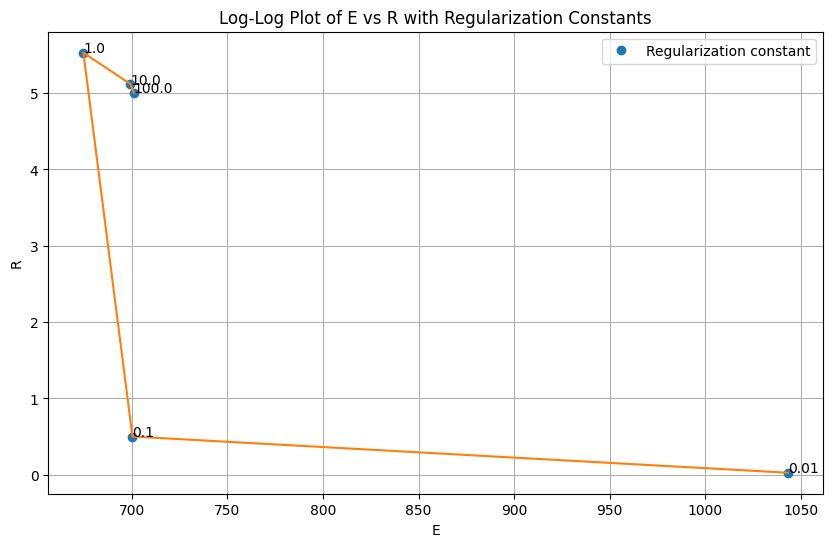

In [8]:
plot_lcurve(l_curve_thwaites, loglog=False)

#### Dotson L-curve

In [4]:
l_curve = create_L_curve(None, variable,reg_const_list = [0.1], outline='data/geojson/dotson-crosson.geojson', mesh='dotson', invert_iter = 300, workers = 4,  lcar=9e3, nosigma_lossfcn = 'nosigma', drichlet_ids = [1,2,5,6,7,8,9,10,11], regularization_grad_fcn = True, constant_val=0.01)

reg_const:  0.1

 function started for C 0.1
Reading local outline
Creating mesh
Reading mesh
Reading bedmachine data
Initializing function spaces
Initializing 3d function spaces
Initializing fields
Defining friction law
Setting ramp power to :  1
Initializing heat transport
Reading velocity from measures database
C0 is constant: 0.01
Using loss function without sigma

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     1.212709e+08   5.898738e+03                  2.234167e+04   
  1     4.008593e+07   2.064367e+03   2.234167e+04   5.585418e+04   3         2         0         2         3         
  2     6.957898e+06   3.305999e+02   5.585418e+04   5.585418e+04   4         3         0         2         2         
  3     1.327649e+06   5.336167e+01   5.585418e+04   5.585418e+04   5         4         0         2         2         
  4     1.327649e+06   5.336167e+01   5.585418e+04

In [5]:

# data = {
#     'Regularization Constant': [0.01, 0.1, 1, 10, 100],
#     'J1': [2267.6773361353717, 1048.1822885449558, 920.1322010148269, 3572.6007040486306, 3571.8336010333956],
#     'J2': [0.08733750798441621, 1.5586142772894822,27.761524638326396, 23.613921786056103, 23.61655309695598]
# }

#l_curve = pd.DataFrame(data)
#l_curve_dotson = l_curve.sort_values('Regularization Constant')
#l_curve_dotson
l_curve


,Regularization Constant,J1,J2
0,0.1,1048.182289,1.558614


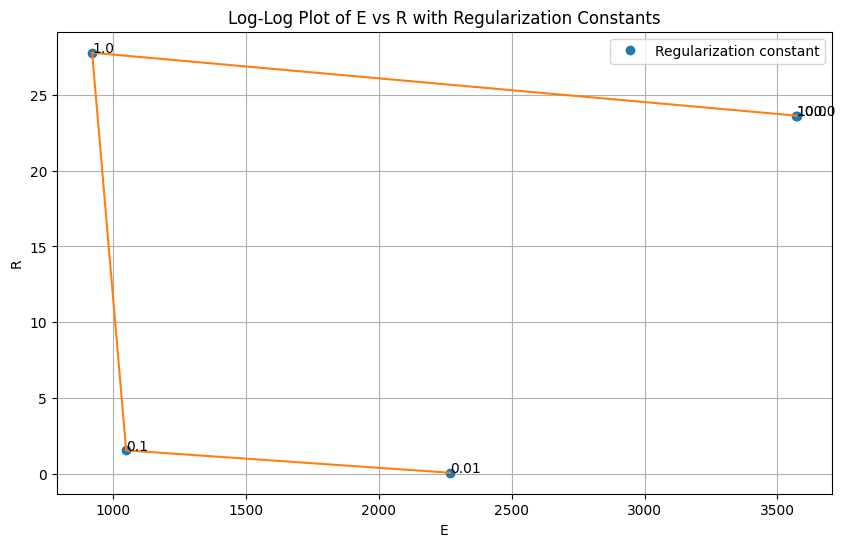

In [12]:
plot_lcurve(l_curve_dotson, loglog=False)

#### Pine Island L Curve

In [8]:
l_curve = create_L_curve(None, variable, outline= 'pine-island', mesh = 'pig', invert_iter = 300, workers = 4,  lcar=9e3, nosigma_lossfcn = 'regular', drichlet_ids = [2,3,4], regularization_grad_fcn = True, constant_val=0.01)


 function started for C 0.01
 function started for C 1
 function started for C 0.1
 function started for C 10



Reading outline from icepack databaseReading outline from icepack databaseReading outline from icepack databaseReading outline from icepack database



Creating meshCreating meshCreating meshCreating mesh



Reading mesh
Reading mesh
Reading meshReading mesh

Reading bedmachine data
Reading bedmachine data
Reading bedmachine data
Reading bedmachine data
Initializing function spaces
Initializing function spaces
Initializing function spaces
Initializing function spaces
Initializing 3d function spaces
Initializing fields
Initializing 3d function spaces
Initializing 3d function spaces
Initializing 3d function spaces
Initializing fieldsInitializing fields

Initializing fields
Defining friction law
Defining friction law
Setting ramp power to :  Setting ramp power to : 1 
1Initializing heat transport

Initializing heat transport
Reading velocity from measures database
Reading velo

In [9]:
l_curve_pine_island = l_curve.sort_values('Regularization Constant')
l_curve_pine_island

,Regularization Constant,J1,J2
0,0.01,15283.996650,0.110820
1,0.10,12543.855057,1.557442
2,1.00,22224.067978,7.879855
3,10.00,22345.054819,7.607984
4,100.00,22190.034328,7.595603


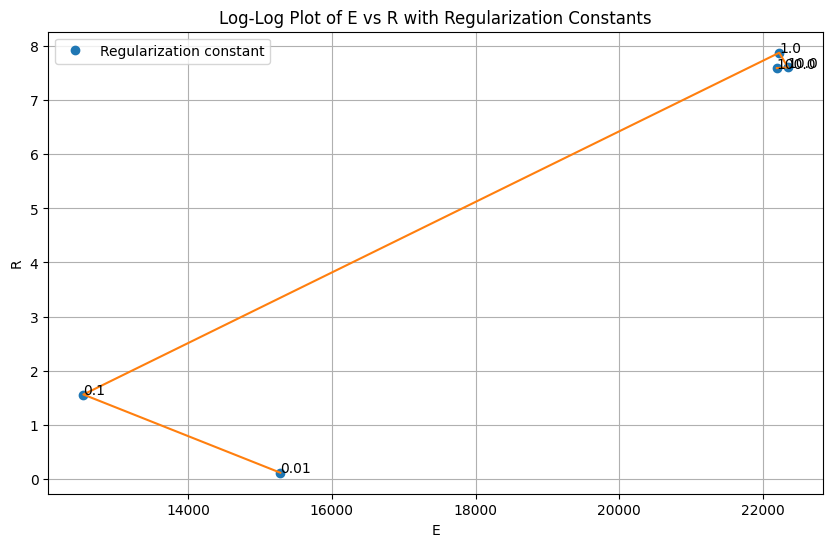

In [10]:
plot_lcurve(l_curve_pine_island, loglog=False)